<a href="https://colab.research.google.com/github/syibrahima31/Machine-Learning-Course/blob/main/Tp1%20k%20nearest%20classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TP 1: K Nearest neighbors classifier 

# 1. Importation des packages librairies  pour le déroulement de ce TP 

In [25]:
 import numpy as np 
 import pandas as pd
 import matplotlib.pyplot as plt 
 from sklearn.model_selection import train_test_split , cross_val_score , validation_curve , GridSearchCV
 from sklearn.preprocessing import StandardScaler 
 from sklearn.neighbors import KNeighborsClassifier
 from seaborn import load_dataset

## 2. Chargemnent du Dataset 

Dans cette section nous allons effectuer les étapes suivantes :

-  importer la fonction  `load_dataset` de la  librairie `seaborn` pour charger le dataset des fleurs d'iris

- Utiliser la fonction `train_test_split` pour procéder á la découpage de notre dataste 

- Normaliser le dataset en utilisant la classe `StandardScaler `


In [71]:
data = load_dataset("iris")

X = data.drop(columns='species')
y = data.species 

X_train , X_test , y_train, y_test = train_test_split(X, y , test_size = 0.2 , random_state = 1234)

# normaliser le train et le test set 
scaler  = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test  = scaler.fit_transform(X_test)

# 3. Création de notre Premier model de Machine Learning 

In [72]:
model = KNeighborsClassifier()
model.fit(X_train, y_train)
model.score(X_train, y_train)
# model.score(X_test, y_test)


SyntaxError: ignored

# 4. Utilisation de la validation de pour améliorer le model 
###  Premier Méthode : utilisation de fonction `cross_val_score`
-----------------------------------------------------------------

In [73]:
L = []
for k in range(2, 50):
  val_score = cross_val_score(KNeighborsClassifier(k), X_train, y_train, cv = 5).mean()
  L.append(val_score)



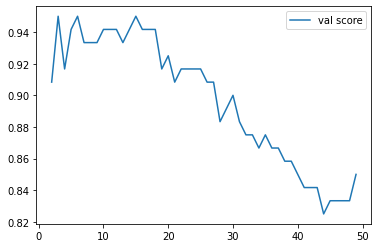

In [74]:
plt.figure()

plt.plot(range(2,50), L, label = "val score")
plt.legend()

## Second  méthode : utilisation de validation_curve
-----------------------------------------

In [75]:
k = np.arange(2, 50)
train_score, test_score = validation_curve(KNeighborsClassifier(), X, y, "n_neighbors",k, cv = 4)


In [76]:
L = test_score.mean(axis = 1)

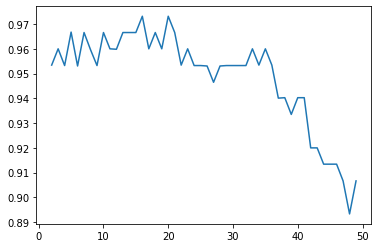

In [77]:
plt.plot(range(2,50), L)

## 3.troisiéme méthode : GridSearchCV

In [78]:
param_grid = {
    "n_neighbors": np.arange(1,50), 
    "metric" : ["minkowski", "manhattan"]
}

grid = GridSearchCV(KNeighborsClassifier(), param_grid= param_grid, cv = 5)
grid.fit(X_train, y_train)


GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'metric': ['minkowski', 'manhattan'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [79]:
grid.best_params_

{'metric': 'manhattan', 'n_neighbors': 12}

In [80]:
model = grid.best_estimator_

In [83]:
model.score(X_test,  y_test)

1.0